##  Perspectives in Computational Research: Homework 01

In [1]:
import random
import numpy
import matplotlib.pyplot as plt

import keras
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Using TensorFlow backend.
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
random.seed(1234)

### LOAD AND PROCESS DATA

In [3]:
#Load the Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
#Preprocess the data by converting the data to a 2D tensor with individual values between 0 and 1
x_train_full = x_train.reshape((60000, 28*28))
x_train_full = x_train_full.astype('float32') / 255

x_test_2D = x_test.reshape((10000, 28*28))
x_test_final = x_test_2D.astype('float32')/ 255

y_train_full = to_categorical(y_train)
y_test_final = to_categorical(y_test)

In [5]:
#Randomly split the training data into 50,000 training observations and 10,000 validation observations
X_train, X_val, Y_train, Y_val = train_test_split(x_train_full, y_train_full, test_size=1/6, random_state=1234)

### INITIAL TEST

In [6]:
#Setup Model - 5 layers
model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
# Compile Model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#Train Model and Track Accuracy
track = model.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.8693 - acc: 0.6836 - val_loss: 0.5758 - val_acc: 0.7556
Epoch 2/200
50000/50000 [==============================] - 6s 119us/step - loss: 0.5217 - acc: 0.8036 - val_loss: 0.4666 - val_acc: 0.8322
Epoch 3/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.4368 - acc: 0.8356 - val_loss: 0.4066 - val_acc: 0.8488
Epoch 4/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.3891 - acc: 0.8552 - val_loss: 0.4518 - val_acc: 0.8367
Epoch 5/200
50000/50000 [==============================] - 7s 131us/step - loss: 0.3536 - acc: 0.8680 - val_loss: 0.5128 - val_acc: 0.8186
Epoch 6/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.3326 - acc: 0.8754 - val_loss: 0.4319 - val_acc: 0.8439
Epoch 7/200
50000/50000 [==============================] - 6s 124us/

50000/50000 [==============================] - 6s 118us/step - loss: 0.1205 - acc: 0.9583 - val_loss: 0.6498 - val_acc: 0.8881
Epoch 58/200
50000/50000 [==============================] - 6s 118us/step - loss: 0.1098 - acc: 0.9607 - val_loss: 0.5095 - val_acc: 0.8947
Epoch 59/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.1192 - acc: 0.9594 - val_loss: 0.5845 - val_acc: 0.8977
Epoch 60/200
50000/50000 [==============================] - 6s 118us/step - loss: 0.1037 - acc: 0.9633 - val_loss: 0.5786 - val_acc: 0.8963
Epoch 61/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.1129 - acc: 0.9603 - val_loss: 0.5117 - val_acc: 0.8905
Epoch 62/200
50000/50000 [==============================] - 6s 119us/step - loss: 0.1075 - acc: 0.9624 - val_loss: 0.5962 - val_acc: 0.8925
Epoch 63/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.1155 - acc: 0.9592 - val_loss: 0.6353 - val_acc: 0.8839
Epoch 64/200
50000/50000 [=======

50000/50000 [==============================] - 6s 118us/step - loss: 0.0779 - acc: 0.9763 - val_loss: 0.6796 - val_acc: 0.8944
Epoch 116/200
50000/50000 [==============================] - 6s 118us/step - loss: 0.0807 - acc: 0.9760 - val_loss: 0.6947 - val_acc: 0.9000
Epoch 117/200
50000/50000 [==============================] - 6s 119us/step - loss: 0.0716 - acc: 0.9770 - val_loss: 0.6997 - val_acc: 0.8949
Epoch 118/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.0664 - acc: 0.9782 - val_loss: 0.7397 - val_acc: 0.8991
Epoch 119/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.0716 - acc: 0.9781 - val_loss: 0.6879 - val_acc: 0.8962
Epoch 120/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.0647 - acc: 0.9796 - val_loss: 0.7047 - val_acc: 0.8966
Epoch 121/200
50000/50000 [==============================] - 6s 118us/step - loss: 0.0735 - acc: 0.9778 - val_loss: 0.6486 - val_acc: 0.8939
Epoch 122/200
50000/50000 [

50000/50000 [==============================] - 6s 117us/step - loss: 0.0680 - acc: 0.9832 - val_loss: 0.7801 - val_acc: 0.8904
Epoch 174/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.0586 - acc: 0.9836 - val_loss: 0.7430 - val_acc: 0.8912
Epoch 175/200
50000/50000 [==============================] - 6s 117us/step - loss: 0.0608 - acc: 0.9853 - val_loss: 0.8649 - val_acc: 0.8818
Epoch 176/200
50000/50000 [==============================] - 6s 116us/step - loss: 0.0629 - acc: 0.9842 - val_loss: 0.8749 - val_acc: 0.8994
Epoch 177/200
50000/50000 [==============================] - 6s 119us/step - loss: 0.0691 - acc: 0.9830 - val_loss: 0.6969 - val_acc: 0.8969
Epoch 178/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.0565 - acc: 0.9859 - val_loss: 0.7262 - val_acc: 0.8833
Epoch 179/200
50000/50000 [==============================] - 6s 120us/step - loss: 0.0619 - acc: 0.9845 - val_loss: 0.9235 - val_acc: 0.8987
Epoch 180/200
50000/50000 [

In [9]:
#Extract Accuracy and Loss from keras callback history
metrics = track.history
val_accuracy = metrics['val_acc']
val_loss = metrics['val_loss']
epochs = numpy.arange(1, len(val_accuracy)+1)


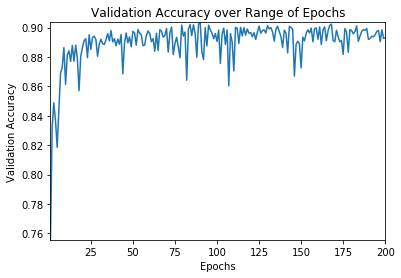

In [10]:
#Plot Accuracy over Epochs
plt.clf()
plt.plot(epochs, val_accuracy)
plt.margins(0)
plt.title("Validation Accuracy over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Accuracy")
plt.show()

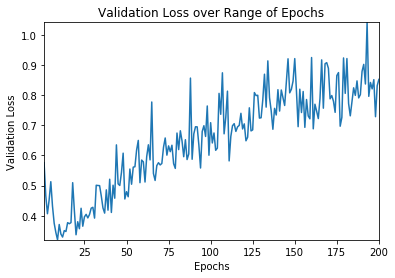

In [11]:
#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, val_loss)
plt.margins(0)
plt.title("Validation Loss over Range of Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.show()

Epoch where the model's performance degrades based on validation Set:


### IMPLEMENT DROPOUT

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 7s 142us/step - loss: 0.9893 - acc: 0.6311 - val_loss: 0.5642 - val_acc: 0.7907
Epoch 2/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.5915 - acc: 0.7857 - val_loss: 0.4893 - val_acc: 0.8274
Epoch 3/200
50000/50000 [==============================] - 7s 138us/step - loss: 0.5179 - acc: 0.8128 - val_loss: 0.4457 - val_acc: 0.8308
Epoch 4/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.4775 - acc: 0.8303 - val_loss: 0.4329 - val_acc: 0.8438
Epoch 5/200
50000/50000 [==============================] - 7s 136us/step - loss: 0.4499 - acc: 0.8392 - val_loss: 0.4124 - val_acc: 0.8519
Epoch 6/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.4293 - acc: 0.8475 - val_loss: 0.4197 - val_acc: 0.8428
E

Epoch 57/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.2907 - acc: 0.9012 - val_loss: 0.3316 - val_acc: 0.8909
Epoch 58/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.2931 - acc: 0.9028 - val_loss: 0.3307 - val_acc: 0.8889
Epoch 59/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.2890 - acc: 0.9032 - val_loss: 0.3344 - val_acc: 0.8893
Epoch 60/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.2927 - acc: 0.9016 - val_loss: 0.3460 - val_acc: 0.8782
Epoch 61/200
50000/50000 [==============================] - 7s 138us/step - loss: 0.2900 - acc: 0.9030 - val_loss: 0.3415 - val_acc: 0.8869
Epoch 62/200
50000/50000 [==============================] - 7s 138us/step - loss: 0.2886 - acc: 0.9036 - val_loss: 0.3448 - val_acc: 0.8840
Epoch 63/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.2876 - acc: 0.9055 - val_loss: 0.3428 - val_acc: 0.8920
Epoch 64/200
50000/5

50000/50000 [==============================] - 7s 136us/step - loss: 0.2991 - acc: 0.9115 - val_loss: 0.3863 - val_acc: 0.8924
Epoch 116/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.2912 - acc: 0.9129 - val_loss: 0.3629 - val_acc: 0.8903
Epoch 117/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.2947 - acc: 0.9110 - val_loss: 0.3678 - val_acc: 0.8938
Epoch 118/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.2894 - acc: 0.9132 - val_loss: 0.3795 - val_acc: 0.8873
Epoch 119/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.2930 - acc: 0.9119 - val_loss: 0.3781 - val_acc: 0.8887
Epoch 120/200
50000/50000 [==============================] - 7s 136us/step - loss: 0.2903 - acc: 0.9128 - val_loss: 0.3739 - val_acc: 0.8916
Epoch 121/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.2967 - acc: 0.9119 - val_loss: 0.3693 - val_acc: 0.8960
Epoch 122/200
50000/50000 [

50000/50000 [==============================] - 7s 137us/step - loss: 0.3383 - acc: 0.9146 - val_loss: 0.4235 - val_acc: 0.8904
Epoch 174/200
50000/50000 [==============================] - 7s 137us/step - loss: 0.3319 - acc: 0.9129 - val_loss: 0.4072 - val_acc: 0.8917
Epoch 175/200
50000/50000 [==============================] - 7s 135us/step - loss: 0.3164 - acc: 0.9150 - val_loss: 0.4102 - val_acc: 0.8945
Epoch 176/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3401 - acc: 0.9133 - val_loss: 0.3994 - val_acc: 0.8923
Epoch 177/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3273 - acc: 0.9137 - val_loss: 0.4105 - val_acc: 0.8873
Epoch 178/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3278 - acc: 0.9140 - val_loss: 0.4329 - val_acc: 0.8920
Epoch 179/200
50000/50000 [==============================] - 7s 134us/step - loss: 0.3499 - acc: 0.9122 - val_loss: 0.4147 - val_acc: 0.8960
Epoch 180/200
50000/50000 [

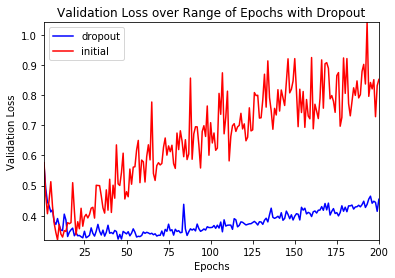

In [12]:
# Create Model with Dropout
model_w_dropout = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_w_dropout.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_dropout = model_w_dropout.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

#Extract Accuracy and Loss from keras callback history
dropout_metrics = track_dropout.history
dropout_loss = dropout_metrics['val_loss']

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, dropout_loss, 'b', label = "dropout")
plt.plot(epochs, val_loss, 'r', label = "initial")
plt.margins(0)
plt.title("Validation Loss over Range of Epochs with Dropout")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

From the graph it is evident that between the initial model and the dropout model, the dropout model performs better.

### WEIGHT REGULARIZATION

In [13]:
# Model with L1 Regularization

model_L1 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l1(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l1(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l1(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l1(0.001)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_L1.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_L1 = model_L1.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 130us/step - loss: 14.7034 - acc: 0.5426 - val_loss: 4.1799 - val_acc: 0.6410
Epoch 2/200
50000/50000 [==============================] - 6s 123us/step - loss: 3.0833 - acc: 0.6513 - val_loss: 2.3541 - val_acc: 0.7074
Epoch 3/200
50000/50000 [==============================] - 6s 125us/step - loss: 2.1957 - acc: 0.6909 - val_loss: 2.0937 - val_acc: 0.7038
Epoch 4/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.8989 - acc: 0.7275 - val_loss: 1.9951 - val_acc: 0.6339
Epoch 5/200
50000/50000 [==============================] - 6s 124us/step - loss: 1.7510 - acc: 0.7434 - val_loss: 1.7276 - val_acc: 0.7376
Epoch 6/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.6427 - acc: 0.7627 - val_loss: 1.6810 - val_acc: 0.7194
Epoch 7/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.5694 - acc: 0.7743 - val_loss: 1

50000/50000 [==============================] - 6s 122us/step - loss: 1.2146 - acc: 0.8407 - val_loss: 1.2171 - val_acc: 0.8367
Epoch 60/200
50000/50000 [==============================] - 6s 123us/step - loss: 1.2134 - acc: 0.8400 - val_loss: 1.2675 - val_acc: 0.8223
Epoch 61/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.2089 - acc: 0.8419 - val_loss: 1.2429 - val_acc: 0.8258
Epoch 62/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.2087 - acc: 0.8419 - val_loss: 1.2076 - val_acc: 0.8398
Epoch 63/200
50000/50000 [==============================] - 6s 123us/step - loss: 1.2080 - acc: 0.8411 - val_loss: 1.2322 - val_acc: 0.8304
Epoch 64/200
50000/50000 [==============================] - 6s 123us/step - loss: 1.2096 - acc: 0.8404 - val_loss: 1.2316 - val_acc: 0.8296
Epoch 65/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.2065 - acc: 0.8420 - val_loss: 1.2301 - val_acc: 0.8286
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 6s 122us/step - loss: 1.1644 - acc: 0.8499 - val_loss: 1.3175 - val_acc: 0.7949
Epoch 118/200
50000/50000 [==============================] - 6s 123us/step - loss: 1.1650 - acc: 0.8483 - val_loss: 1.1697 - val_acc: 0.8447
Epoch 119/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.1644 - acc: 0.8483 - val_loss: 1.2481 - val_acc: 0.8197
Epoch 120/200
50000/50000 [==============================] - 6s 126us/step - loss: 1.1632 - acc: 0.8485 - val_loss: 1.2047 - val_acc: 0.8254
Epoch 121/200
50000/50000 [==============================] - 6s 123us/step - loss: 1.1620 - acc: 0.8483 - val_loss: 1.1666 - val_acc: 0.8463
Epoch 122/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.1634 - acc: 0.8481 - val_loss: 1.2169 - val_acc: 0.8291
Epoch 123/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.1593 - acc: 0.8503 - val_loss: 1.2370 - val_acc: 0.8212
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 6s 122us/step - loss: 1.1459 - acc: 0.8505 - val_loss: 1.1745 - val_acc: 0.8372
Epoch 176/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.1424 - acc: 0.8527 - val_loss: 1.1915 - val_acc: 0.8326
Epoch 177/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.1403 - acc: 0.8528 - val_loss: 1.1869 - val_acc: 0.8324
Epoch 178/200
50000/50000 [==============================] - 6s 126us/step - loss: 1.1413 - acc: 0.8518 - val_loss: 1.1645 - val_acc: 0.8380
Epoch 179/200
50000/50000 [==============================] - 6s 125us/step - loss: 1.1408 - acc: 0.8533 - val_loss: 1.1707 - val_acc: 0.8422
Epoch 180/200
50000/50000 [==============================] - 6s 122us/step - loss: 1.1409 - acc: 0.8528 - val_loss: 1.1942 - val_acc: 0.8308
Epoch 181/200
50000/50000 [==============================] - 6s 123us/step - loss: 1.1406 - acc: 0.8533 - val_loss: 1.1683 - val_acc: 0.8415
Epoch 182/200
50000/50000 [

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 6s 130us/step - loss: 2.2128 - acc: 0.6749 - val_loss: 1.6268 - val_acc: 0.7226
Epoch 2/200
50000/50000 [==============================] - 6s 124us/step - loss: 1.2209 - acc: 0.7878 - val_loss: 1.0145 - val_acc: 0.7994
Epoch 3/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.9159 - acc: 0.8124 - val_loss: 0.8336 - val_acc: 0.8161
Epoch 4/200
50000/50000 [==============================] - 6s 123us/step - loss: 0.7609 - acc: 0.8272 - val_loss: 0.9182 - val_acc: 0.7547
Epoch 5/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.6790 - acc: 0.8339 - val_loss: 0.6880 - val_acc: 0.8257
Epoch 6/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.6249 - acc: 0.8421 - val_loss: 0.6593 - val_acc: 0.8233
Epoch 7/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.5912 - acc: 0.8485 - val_loss: 0.

50000/50000 [==============================] - 6s 121us/step - loss: 0.3610 - acc: 0.9013 - val_loss: 0.4440 - val_acc: 0.8713
Epoch 60/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.3576 - acc: 0.9021 - val_loss: 0.4573 - val_acc: 0.8667
Epoch 61/200
50000/50000 [==============================] - 6s 124us/step - loss: 0.3580 - acc: 0.9025 - val_loss: 0.4519 - val_acc: 0.8738
Epoch 62/200
50000/50000 [==============================] - 6s 125us/step - loss: 0.3584 - acc: 0.9010 - val_loss: 0.4160 - val_acc: 0.8835
Epoch 63/200
50000/50000 [==============================] - 6s 123us/step - loss: 0.3523 - acc: 0.9053 - val_loss: 0.4020 - val_acc: 0.8837
Epoch 64/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.3538 - acc: 0.9032 - val_loss: 0.4127 - val_acc: 0.8848
Epoch 65/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.3550 - acc: 0.9022 - val_loss: 0.4593 - val_acc: 0.8632
Epoch 66/200
50000/50000 [=======

50000/50000 [==============================] - 6s 122us/step - loss: 0.3273 - acc: 0.9155 - val_loss: 0.4363 - val_acc: 0.8738
Epoch 118/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3298 - acc: 0.9127 - val_loss: 0.5004 - val_acc: 0.8560
Epoch 119/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.3297 - acc: 0.9134 - val_loss: 0.4203 - val_acc: 0.8788
Epoch 120/200
50000/50000 [==============================] - 6s 124us/step - loss: 0.3290 - acc: 0.9143 - val_loss: 0.4806 - val_acc: 0.8572
Epoch 121/200
50000/50000 [==============================] - 6s 124us/step - loss: 0.3265 - acc: 0.9142 - val_loss: 0.4740 - val_acc: 0.8690
Epoch 122/200
50000/50000 [==============================] - 6s 122us/step - loss: 0.3283 - acc: 0.9141 - val_loss: 0.5342 - val_acc: 0.8483
Epoch 123/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3300 - acc: 0.9128 - val_loss: 0.4770 - val_acc: 0.8598
Epoch 124/200
50000/50000 [

50000/50000 [==============================] - 6s 122us/step - loss: 0.3177 - acc: 0.9188 - val_loss: 0.4693 - val_acc: 0.8733
Epoch 176/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3143 - acc: 0.9186 - val_loss: 0.5471 - val_acc: 0.8284
Epoch 177/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3221 - acc: 0.9177 - val_loss: 0.5187 - val_acc: 0.8598
Epoch 178/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3201 - acc: 0.9178 - val_loss: 0.4558 - val_acc: 0.8754
Epoch 179/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3146 - acc: 0.9183 - val_loss: 0.5219 - val_acc: 0.8513
Epoch 180/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3158 - acc: 0.9184 - val_loss: 0.4309 - val_acc: 0.8797
Epoch 181/200
50000/50000 [==============================] - 6s 121us/step - loss: 0.3170 - acc: 0.9187 - val_loss: 0.4321 - val_acc: 0.8821
Epoch 182/200
50000/50000 [

NameError: name 'l1_loss' is not defined

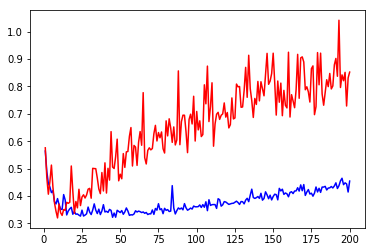

In [14]:
# Model with L2 Regularization
model_L2 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_L2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_L2 = model_L2.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

#Extract Validation Loss from keras callback history
L1_metrics = track_L1.history
L1_loss = L1_metrics['val_loss']

L2_metrics = track_L2.history
L2_loss = L2_metrics['val_loss']

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, dropout_loss, 'b', label = "dropout")
plt.plot(epochs, val_loss, 'r', label = "initial")
plt.plot(epochs, l1_loss, 'g', label = "l1 reg")
plt.plot(epochs, l2_loss, 'm', label = "l2 reg")
plt.margins(0)
plt.title("Validation Loss over Range of Epochs with Dropout and Regularization")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

Comparison: From all the models, the best performing model is:

### HYPERPARAMETER TUNING: 10 MODEL EVALUATION

In [15]:
#Alter the number of layers on batch size 256
# 3 Layers
model_layer3 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 5 Layers 
model_layer5 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# 7 Layers
model_layer7 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_layer3.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_layer5.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_layer7.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_layer3 = model_layer3.fit(X_train, Y_train, batch_size = 256, epochs=200, validation_data = (X_val, Y_val))
track_layer5 = model_layer5.fit(X_train, Y_train, batch_size = 256, epochs=200, validation_data = (X_val, Y_val))
track_layer7 = model_layer7.fit(X_train, Y_train, batch_size = 256, epochs=200, validation_data = (X_val, Y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/200
50000/50000 [==============================] - 4s 77us/step - loss: 0.6339 - acc: 0.7767 - val_loss: 0.4856 - val_acc: 0.8203
Epoch 2/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.4129 - acc: 0.8477 - val_loss: 0.3978 - val_acc: 0.8498
Epoch 3/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.3562 - acc: 0.8673 - val_loss: 0.4341 - val_acc: 0.8412
Epoch 4/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.3270 - acc: 0.8783 - val_loss: 0.4366 - val_acc: 0.8355
Epoch 5/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.3002 - acc: 0.8882 - val_loss: 0.3763 - val_acc: 0.8644
Epoch 6/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.2811 - acc: 0.8950 - val_loss: 0.3723 - val_acc: 0.8622
Epoch 7/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.2685 - acc: 0.8984 - val_loss: 0.3352 - 

50000/50000 [==============================] - 3s 68us/step - loss: 0.0872 - acc: 0.9690 - val_loss: 0.6519 - val_acc: 0.8858
Epoch 60/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0907 - acc: 0.9696 - val_loss: 0.6391 - val_acc: 0.8873
Epoch 61/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0873 - acc: 0.9696 - val_loss: 0.9477 - val_acc: 0.8716
Epoch 62/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0843 - acc: 0.9709 - val_loss: 0.6426 - val_acc: 0.8966
Epoch 63/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0792 - acc: 0.9717 - val_loss: 0.6879 - val_acc: 0.8943
Epoch 64/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0824 - acc: 0.9712 - val_loss: 0.6226 - val_acc: 0.8987
Epoch 65/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0833 - acc: 0.9715 - val_loss: 0.6633 - val_acc: 0.8913
Epoch 66/200
50000/50000 [==============

Epoch 118/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0559 - acc: 0.9824 - val_loss: 1.0155 - val_acc: 0.8863
Epoch 119/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0542 - acc: 0.9835 - val_loss: 1.1145 - val_acc: 0.8676
Epoch 120/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0558 - acc: 0.9836 - val_loss: 0.7818 - val_acc: 0.8958
Epoch 121/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0548 - acc: 0.9837 - val_loss: 0.8357 - val_acc: 0.8943
Epoch 122/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0553 - acc: 0.9836 - val_loss: 0.9906 - val_acc: 0.8856
Epoch 123/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0548 - acc: 0.9834 - val_loss: 0.8501 - val_acc: 0.8990
Epoch 124/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0537 - acc: 0.9838 - val_loss: 0.8380 - val_acc: 0.8974
Epoch 125/200
50000/

50000/50000 [==============================] - 3s 68us/step - loss: 0.0477 - acc: 0.9876 - val_loss: 0.9671 - val_acc: 0.8982
Epoch 177/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0465 - acc: 0.9872 - val_loss: 0.9788 - val_acc: 0.8902
Epoch 178/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0437 - acc: 0.9879 - val_loss: 1.0085 - val_acc: 0.8955
Epoch 179/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0435 - acc: 0.9879 - val_loss: 1.0430 - val_acc: 0.8870
Epoch 180/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0418 - acc: 0.9881 - val_loss: 1.0313 - val_acc: 0.8953
Epoch 181/200
50000/50000 [==============================] - 3s 68us/step - loss: 0.0437 - acc: 0.9881 - val_loss: 1.0305 - val_acc: 0.8937
Epoch 182/200
50000/50000 [==============================] - 3s 69us/step - loss: 0.0428 - acc: 0.9882 - val_loss: 1.0292 - val_acc: 0.8925
Epoch 183/200
50000/50000 [=======

50000/50000 [==============================] - 6s 126us/step - loss: 0.1911 - acc: 0.9337 - val_loss: 0.4213 - val_acc: 0.8859
Epoch 35/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.1849 - acc: 0.9358 - val_loss: 0.4145 - val_acc: 0.8908
Epoch 36/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1826 - acc: 0.9357 - val_loss: 0.5882 - val_acc: 0.8743
Epoch 37/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1774 - acc: 0.9381 - val_loss: 0.4775 - val_acc: 0.8782
Epoch 38/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1816 - acc: 0.9376 - val_loss: 0.4441 - val_acc: 0.8831
Epoch 39/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1875 - acc: 0.9384 - val_loss: 0.4468 - val_acc: 0.8867
Epoch 40/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1799 - acc: 0.9399 - val_loss: 0.5613 - val_acc: 0.8786
Epoch 41/200
50000/50000 [=======

50000/50000 [==============================] - 6s 126us/step - loss: 0.1252 - acc: 0.9623 - val_loss: 0.6628 - val_acc: 0.8922
Epoch 93/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1305 - acc: 0.9627 - val_loss: 0.6306 - val_acc: 0.8952
Epoch 94/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1342 - acc: 0.9619 - val_loss: 0.6523 - val_acc: 0.8798
Epoch 95/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1305 - acc: 0.9632 - val_loss: 0.6203 - val_acc: 0.8968
Epoch 96/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1221 - acc: 0.9635 - val_loss: 0.6568 - val_acc: 0.8899
Epoch 97/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1452 - acc: 0.9608 - val_loss: 0.6106 - val_acc: 0.8935
Epoch 98/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1349 - acc: 0.9637 - val_loss: 0.8660 - val_acc: 0.8748
Epoch 99/200
50000/50000 [=======

50000/50000 [==============================] - 6s 126us/step - loss: 0.1310 - acc: 0.9704 - val_loss: 0.7706 - val_acc: 0.8979
Epoch 151/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1157 - acc: 0.9731 - val_loss: 0.8169 - val_acc: 0.8824
Epoch 152/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1101 - acc: 0.9728 - val_loss: 0.8843 - val_acc: 0.8885
Epoch 153/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1043 - acc: 0.9741 - val_loss: 0.7981 - val_acc: 0.8967
Epoch 154/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.0970 - acc: 0.9747 - val_loss: 0.7826 - val_acc: 0.8924
Epoch 155/200
50000/50000 [==============================] - 6s 127us/step - loss: 0.0889 - acc: 0.9767 - val_loss: 0.7756 - val_acc: 0.8911
Epoch 156/200
50000/50000 [==============================] - 6s 126us/step - loss: 0.1040 - acc: 0.9744 - val_loss: 0.8423 - val_acc: 0.8861
Epoch 157/200
50000/50000 [

Epoch 8/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.3112 - acc: 0.8875 - val_loss: 0.4238 - val_acc: 0.8701
Epoch 9/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.3011 - acc: 0.8903 - val_loss: 0.3532 - val_acc: 0.8760
Epoch 10/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.3009 - acc: 0.8955 - val_loss: 0.3287 - val_acc: 0.8848
Epoch 11/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2838 - acc: 0.8982 - val_loss: 0.4667 - val_acc: 0.8524
Epoch 12/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2852 - acc: 0.8985 - val_loss: 0.4008 - val_acc: 0.8634
Epoch 13/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2775 - acc: 0.9019 - val_loss: 0.3713 - val_acc: 0.8804
Epoch 14/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2751 - acc: 0.9009 - val_loss: 0.4283 - val_acc: 0.8510
Epoch 15/200
50000/500

50000/50000 [==============================] - 9s 182us/step - loss: 0.1890 - acc: 0.9435 - val_loss: 0.5984 - val_acc: 0.8909
Epoch 67/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.1893 - acc: 0.9438 - val_loss: 0.7666 - val_acc: 0.8788
Epoch 68/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.1944 - acc: 0.9432 - val_loss: 0.6582 - val_acc: 0.8904
Epoch 69/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.2524 - acc: 0.9416 - val_loss: 0.4827 - val_acc: 0.8918
Epoch 70/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2050 - acc: 0.9457 - val_loss: 0.6983 - val_acc: 0.8663
Epoch 71/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.2095 - acc: 0.9445 - val_loss: 0.8538 - val_acc: 0.8629
Epoch 72/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2208 - acc: 0.9434 - val_loss: 0.7431 - val_acc: 0.8575
Epoch 73/200
50000/50000 [=======

50000/50000 [==============================] - 9s 182us/step - loss: 0.1903 - acc: 0.9586 - val_loss: 0.9445 - val_acc: 0.8662
Epoch 125/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.2166 - acc: 0.9579 - val_loss: 0.9609 - val_acc: 0.8789
Epoch 126/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.2167 - acc: 0.9567 - val_loss: 0.6640 - val_acc: 0.8880
Epoch 127/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2120 - acc: 0.9580 - val_loss: 0.8648 - val_acc: 0.8855
Epoch 128/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.2055 - acc: 0.9567 - val_loss: 0.7997 - val_acc: 0.8852
Epoch 129/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.1981 - acc: 0.9602 - val_loss: 0.8235 - val_acc: 0.8935
Epoch 130/200
50000/50000 [==============================] - 9s 182us/step - loss: 0.1980 - acc: 0.9592 - val_loss: 0.8297 - val_acc: 0.8944
Epoch 131/200
50000/50000 [

50000/50000 [==============================] - 9s 183us/step - loss: 0.3160 - acc: 0.9559 - val_loss: 0.9932 - val_acc: 0.8854
Epoch 183/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2157 - acc: 0.9631 - val_loss: 0.9254 - val_acc: 0.8764
Epoch 184/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.3202 - acc: 0.9561 - val_loss: 0.9009 - val_acc: 0.8874
Epoch 185/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2366 - acc: 0.9621 - val_loss: 0.8860 - val_acc: 0.8816
Epoch 186/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2582 - acc: 0.9598 - val_loss: 0.8063 - val_acc: 0.8808
Epoch 187/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2504 - acc: 0.9625 - val_loss: 0.9548 - val_acc: 0.8819
Epoch 188/200
50000/50000 [==============================] - 9s 183us/step - loss: 0.2934 - acc: 0.9572 - val_loss: 1.2933 - val_acc: 0.8638
Epoch 189/200
50000/50000 [

In [ ]:
#Extract Validation Loss from keras callback history
layer3_metrics = track_layer3.history
layer3_loss = layer3_metrics['val_loss']

layer5_metrics = track_layer5.history
layer5_loss = layer5_metrics['val_loss']

layer7_metrics = track_layer.history
layer7_loss = layer7_metrics['val_loss']

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, layer3_loss, 'b', label = "3 layers")
plt.plot(epochs, layer5_loss, 'r', label = "5 layers")
plt.plot(epochs, layer7_loss, 'g', label = "7 layers")
plt.margins(0)
plt.title("Validation Loss for Varying Layers with batch size 256")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [ ]:
def best_estimate(metric_list):
    min_val = min(metric_list)
    best_iter = metric_list.index(min_val)
    return (min_val, best_iter + 1)

In [ ]:
#Find Best Estimate of Each Model
(layer3_min, layer3_best) = best_estimate(layer3_loss)
(layer5_min, layer5_best) = best_estimate(layer5_loss)
(layer7_min, layer7_best) = best_estimate(layer7_loss)

print(layer3_min, layer5_min, layer7_min)

Compare 5 layers with batch size 512 vs batch size 256

Of the varying layers 3, 5, 7: the best model is:

In [ ]:
#Varying Dropout Rate: constant 0.5, constant 0.8, varying from 0.9 - 0.3
model_DRpt5 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_DRpt8 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model_DRvar = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dropout(0.9),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.7),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.6),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [ ]:
#Compile Model
model_DRpt5.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_DRpt8.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_DRvar.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_DRpt5 = model_DRpt5.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))
track_DRpt8 = model_DRpt8.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))
track_DRvar = model_DRvar.fit(X_train, Y_train, batch_size = 512, epochs=200, validation_data = (X_val, Y_val))

In [ ]:
#Extract Validation Loss from keras callback history
DRpt5_metrics = track_DRpt5.history
DRpt5_loss = DRpt5_metrics['val_loss']

DRpt8_metrics = track_DRpt8.history
DRpt8_loss = DRpt8_metrics['val_loss']

DRvar_metrics = track_DRvar.history
DRvar_loss = DRvar_metrics['val_loss']

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, DRpt5_loss, 'b', label = "dropout rate of 0.5")
plt.plot(epochs, DRpt8_loss, 'r', label = "dropout rate of 0.8")
plt.plot(epochs, DRvar_loss, 'g', label = "dropout rate 0.9 to 0.4")
plt.margins(0)
plt.title("Validation Loss for Varying Dropout Rate with batch size 512")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [ ]:
#Find Best Estimate of Each Model
(pt5_min, pt5_best) = best_estimate(DRpt5_loss)
(pt8_min, pt8_best) = best_estimate(DRpt8_loss)
(var_min, var_best) = best_estimate(DRvar_loss)

print(pt5_min, pt8_min, var_min)

Comparison: Of the threee models that vary the dropout rate by 0.5, 0.8 and range 0.9 to 0.4 on seven layered model with batch size 512 and epochs 200, the best performing model is

In [ ]:
# Varying Epochs - 100, 300, 500 on Initial Model

model = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28 * 28,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile Model
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_ep100 = model.fit(X_train, Y_train, batch_size = 512, epochs=100, validation_data = (X_val, Y_val))
track_ep300 = model.fit(X_train, Y_train, batch_size = 512, epochs=300, validation_data = (X_val, Y_val))
track_ep500 = model.fit(X_train, Y_train, batch_size = 512, epochs=500, validation_data = (X_val, Y_val))

In [ ]:
#Extract Accuracy and Loss from keras callback history
ep100_metrics = track_ep100.history
ep100_loss = ep100_metrics['val_loss']
epochs_100 = numpy.arange(1, len(ep100_loss)+1)

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs_100, ep100_loss, 'b', label = "Epoch = 100")
plt.margins(0)
plt.title("Validation Loss with 100 Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

ep300_metrics = track_ep300.history
ep300_loss = ep300_metrics['val_loss']
epochs_300 = numpy.arange(1, len(ep300_loss)+1)

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs_300, ep300_loss, 'r', label = "Epoch = 300")
plt.margins(0)
plt.title("Validation Loss with 300 Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

ep500_metrics = track_ep500.history
ep500_loss = ep500_metrics['val_loss']
epochs_500 = numpy.arange(1, len(ep500_loss)+1)

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs_500, ep500_loss, 'g', label = "Epoch = 500")
plt.margins(0)
plt.title("Validation Loss with 500 Epochs")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()


In [ ]:
#Find Best Estimate of Each Model
(ep100_min, ep100_best) = best_estimate(ep100_loss)
(ep300_min, ep300_best) = best_estimate(ep300_loss)
(ep500_min, ep500_best) = best_estimate(ep500_loss)

print(ep100_min, ep300_min, ep500_min)

In [ ]:
Comparison

In [ ]:
#Adding Weight - L2 with lower number of epochs
model_L2 = keras.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer = regularizers.l2(0.001)),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

#Compile Model
model_L2.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_L2 = model_L2.fit(X_train, Y_train, batch_size = 512, epochs=50, validation_data = (X_val, Y_val))

#Extract Validation Loss from keras callback history
L1_metrics = track_L1.history
L1_loss = L1_metrics['val_loss']

L2_metrics = track_L2.history
L2_loss = L2_metrics['val_loss']

#Plot Loss over Epochs
plt.clf()
plt.plot(epochs, dropout_loss, 'b', label = "dropout")
plt.plot(epochs, val_loss, 'r', label = "initial")
plt.plot(epochs, l1_loss, 'g', label = "l1 reg")
plt.plot(epochs, l2_loss, 'm', label = "l2 reg")
plt.margins(0)
plt.title("Validation Loss over Range of Epochs with Dropout and Regularization")
plt.xlabel('Epochs')
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

### FINAL MODEL

The alternate models were compared by varying epoch, layers, changing dropout and adding weight.

In [ ]:
Best Model


In [ ]:
#Compile Model
model_final.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Train Model and Track Accuracy
track_final = model_final.fit(x_train_full, y_train_full, batch_size = 512, epochs=200, validation_data = (x_test_final, Y_test_final))

#Evaluate Best Model
model_final.evaluate(x_final_test, y_final_test)